# Play Store apps data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

### Data Understanding

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Check Duplicates

In [4]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [5]:
df.duplicated().sum()

np.int64(483)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

### Fixing Columns

While checking the dataset, a **misaligned** row was detected — the `Category` column contained `NaN` while other values had shifted left.
This issue was fixed by manually **realigning** the affected row so that each value matched the correct column structure.

In [8]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
df.loc[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df.loc[10472, :] = [
    "Life Made WI-Fi Touchscreen Photo Frame",
    np.nan,
    1.9,
    19.0,
    "3.0M",
    "1,000+",
    "Free",
    0,
    "Everyone",
    "NaN",
    "February 11, 2018",
    "1.0.19",
    "4.0 and up"
]

In [11]:
df.loc[10472, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

The `Reviews` column was converted from string to integer type after confirming all values were numeric.

In [12]:
df['Reviews'] = df['Reviews'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


While converting the **`Size`** column to numeric values, a `ValueError` occurred due to non-numeric entries such as `"Varies with device"`.  
The issue was resolved by applying a custom function to convert sizes like `M`, `k`, and replace text values with `NaN`.

In [14]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
def convert_size(x):
    if 'M' in x:
        return float(x.replace('M',''))
    elif 'k' in x:
        return float(x.replace('k','')) / 1000
    elif 'Varies with device' in x:
        return np.nan
    else:
        return np.nan
    
df['Size_MB'] = df['Size'].apply(convert_size)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [16]:
df = df.drop('Size', axis=1)

While cleaning the **`Installs`** column, all values contained symbols like `+` and `,`.  
These were removed using regex, and the column was successfully converted to integers.

In [17]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
df["Installs"] = df["Installs"].str.replace("[+,]", "", regex = True).astype(int)
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


The **`Price`** column contained dollar signs (`$`) in its values.  
These symbols were removed using regex, and the column was successfully converted to float.


In [19]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 0, '$1.20', '$1.04'], dtype=object)

In [20]:
df["Price"] = df["Price"].str.replace("[$]", "", regex = True).astype(float)
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Installs        10358 non-null  int64  
 5   Type            10357 non-null  object 
 6   Price           10357 non-null  float64
 7   Content Rating  10358 non-null  object 
 8   Genres          10358 non-null  object 
 9   Last Updated    10358 non-null  object 
 10  Current Ver     10350 non-null  object 
 11  Android Ver     10356 non-null  object 
 12  Size_MB         8832 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [22]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

The **`Last Updated`** column was successfully converted to datetime format using `pd.to_datetime()` for better date handling and analysis.

In [23]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10358 non-null  int64         
 4   Installs        10358 non-null  int64         
 5   Type            10357 non-null  object        
 6   Price           10357 non-null  float64       
 7   Content Rating  10358 non-null  object        
 8   Genres          10358 non-null  object        
 9   Last Updated    10358 non-null  datetime64[ns]
 10  Current Ver     10350 non-null  object        
 11  Android Ver     10356 non-null  object        
 12  Size_MB         8832 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.4+ MB


The `Current Ver` column was dropped since it is not required for the analysis questions.
It does not provide any useful insights or affect the results of the upcoming queries.

In [25]:
df = df.drop('Current Ver', axis=1)
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,2.8


The `Android Ver` column contained mixed formats (e.g., “4.0 and up”, “4.0.3 - 7.1.1”, and “Varies with device”).
Non-numeric values such as “Varies with device” were replaced with `NaN`, and the first valid Android version number was extracted using a regular expression.
A new numeric column `Android_Ver_Num` was created for easier analysis.

In [26]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [27]:
df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)

df['Android_Ver_Num'] = df['Android Ver'].str.extract(r'(\d+\.\d+)')

df['Android_Ver_Num'] = df['Android_Ver_Num'].astype(float)

df.head()


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Size_MB,Android_Ver_Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up,19.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,14.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0.3 and up,8.7,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2 and up,25.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,2.8,4.4


### Handle Missing Values

In [28]:
df.isna().sum()

App                   0
Category              1
Rating             1465
Reviews               0
Installs              0
Type                  1
Price                 1
Content Rating        0
Genres                0
Last Updated          0
Android Ver        1223
Size_MB            1526
Android_Ver_Num    1223
dtype: int64

Rows containing missing values in key columns such as `Category`, `Type`, or `Price` were dropped.
Since the dataset is large, removing a few incomplete records ensures cleaner analysis without affecting overall trends.

In [29]:
df = df.dropna(subset=['Category', 'Type', 'Price'])

Missing values in the **`Rating`** column were handled by replacing them with the **median** value.  
This approach minimizes the effect of outliers and maintains the overall data distribution.

In [30]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

Missing values in the **`Size_MB`** column were filled using the **median** size value.  
This ensures a consistent scale representation without being skewed by extreme values.

In [31]:
df['Size_MB'] = df['Size_MB'].fillna(df['Size_MB'].median())

Missing values in the **`Android Ver`** and **`Android_Ver_Num`** columns were replaced with the **most frequent (mode)** value.  
This maintains logical consistency with the majority of app version requirements.

In [32]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])
df['Android_Ver_Num'] = df['Android_Ver_Num'].fillna(df['Android_Ver_Num'].mode()[0])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10356 non-null  object        
 1   Category         10356 non-null  object        
 2   Rating           10356 non-null  float64       
 3   Reviews          10356 non-null  int64         
 4   Installs         10356 non-null  int64         
 5   Type             10356 non-null  object        
 6   Price            10356 non-null  float64       
 7   Content Rating   10356 non-null  object        
 8   Genres           10356 non-null  object        
 9   Last Updated     10356 non-null  datetime64[ns]
 10  Android Ver      10356 non-null  object        
 11  Size_MB          10356 non-null  float64       
 12  Android_Ver_Num  10356 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.1+ MB


### Analytical Questions

In [34]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Size_MB,Android_Ver_Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up,19.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,14.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0.3 and up,8.7,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2 and up,25.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,2.8,4.4


1.	What is the most expensive app on the Play Store?

In [35]:
most_exp = df.loc[df['Price'].idxmax()]
most_exp[['App', 'Price']]

App      I'm Rich - Trump Edition
Price                       400.0
Name: 4367, dtype: object

2.	Which genre has the highest number of apps?

In [36]:
genre_counts = df['Genres'].str.split(';').explode().value_counts()
genre_counts.head(1)

Genres
Tools    843
Name: count, dtype: int64

3.	What is the average size of free vs. paid apps?

In [37]:
avg_size_per_type = df.groupby('Type')['Size_MB'].mean().reset_index()
avg_size_per_type

,Type,Size_MB
0,Free,20.189799
1,Paid,18.532157


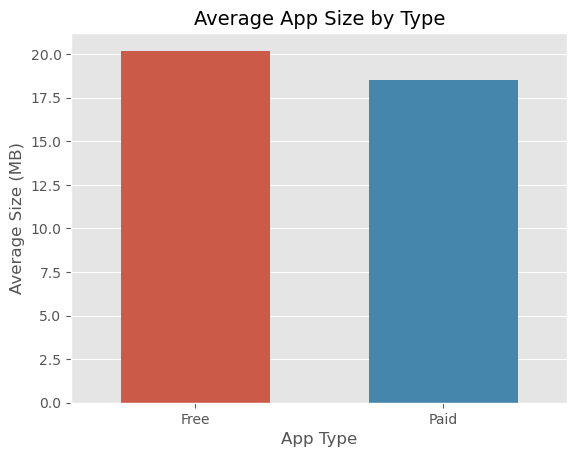

In [38]:
plt.style.use('ggplot')
sns.barplot(data=avg_size_per_type, x='Type', y='Size_MB', hue='Type', width=0.6, legend=False)

plt.title('Average App Size by Type', fontsize=14)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Average Size (MB)', fontsize=12)



plt.show()


4.	What are the top 5 most expensive apps with a perfect rating (5)?

In [39]:
top5 = df[(df['Rating'] == 5.0) & (df['Price'] > 0)].sort_values('Price', ascending=False).head(5)
top5[['App', 'Price']]

,App,Price
5489,AP Art History Flashcards,29.99
7477,USMLE Step 2 CK Flashcards,19.99
5482,meStudying: AP English Lit,4.99
5246,Hey AJ! It's Bedtime!,4.99
7204,TI-84 CE Graphing Calculator Manual TI 84,4.99


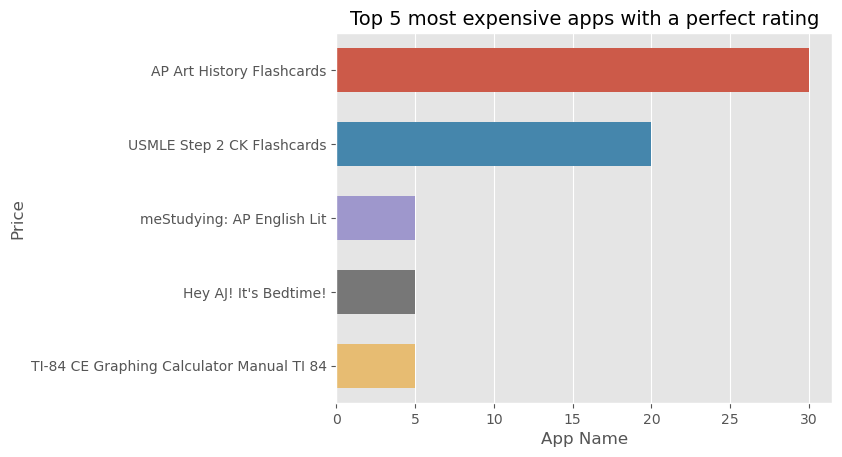

In [81]:
sns.barplot(data=top5, x='Price', y='App', hue='App', width=0.6, legend=False)

plt.title('Top 5 most expensive apps with a perfect rating', fontsize=14)
plt.xlabel('App Name', fontsize=12)
plt.ylabel('Price', fontsize=12)
# plt.xticks(rotation=45, ha='right')

plt.show()

5.	How many apps have received more than 50K reviews?

In [41]:
apps = (df['Reviews'] > 50000).sum()
apps

np.int64(2525)

6.	What is the average price of apps, grouped by genre and number of installs?

In [ ]:
df_exploded = df.assign(Genres=df['Genres'].str.split(';')).explode('Genres')

avg_price_by_genre_installs = (
    df_exploded.groupby(['Genres', 'Installs'])['Price']
    .mean()
    .reset_index()
)

avg_price_by_genre_installs.head(10)

,Genres,Installs,Price
0,Action,10,0.000000
1,Action,50,0.663333
2,Action,100,1.096000
3,Action,500,0.995000
4,Action,1000,0.372500
5,Action,5000,0.000000
6,Action,10000,2.051667
7,Action,50000,0.398667
8,Action,100000,0.389268
9,Action,500000,0.090455


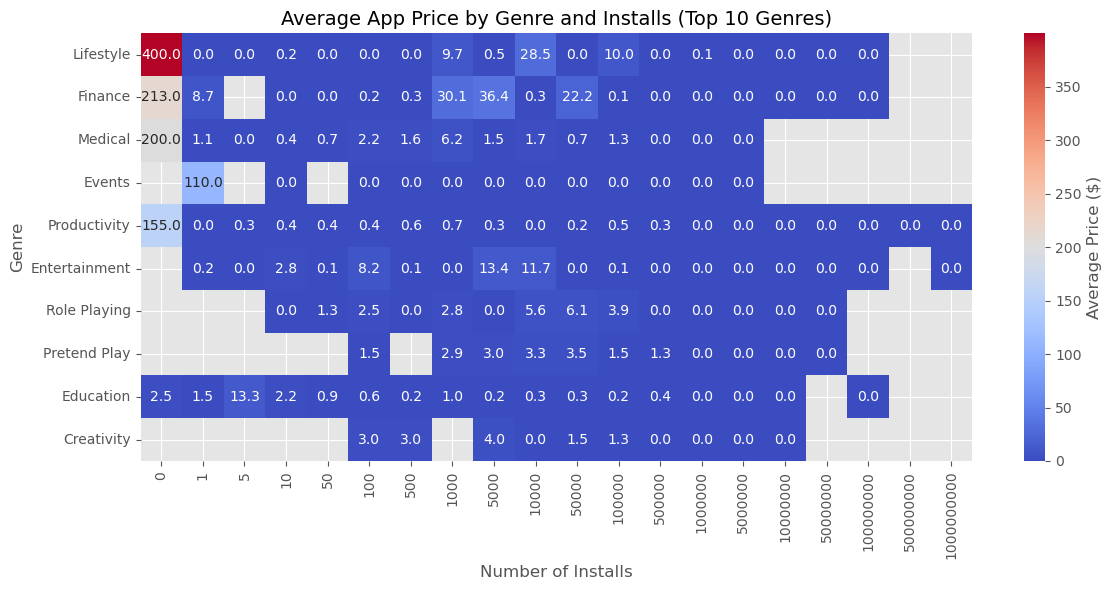

In [83]:
pivot_table = avg_price_by_genre_installs.pivot_table(
    index='Genres', 
    columns='Installs', 
    values='Price', 
    aggfunc='mean'
)

top10_genres = pivot_table.mean(axis=1).sort_values(ascending=False).head(10)
pivot_top10 = pivot_table.loc[top10_genres.index]

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_top10, 
    annot=True, fmt=".1f", cmap="coolwarm", 
    cbar_kws={'label': 'Average Price ($)'}
)

plt.title("Average App Price by Genre and Installs (Top 10 Genres)", fontsize=14)
plt.xlabel("Number of Installs")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


7.	How many apps have a rating higher than 4.7, and what is their average price?

In [73]:
higher_rating = (df['Rating'] > 4.7).sum()
higher_rating_avg_price = df.loc[df['Rating'] > 4.7, 'Price'].mean()
print("Number of higher rating apps:", higher_rating)
print("Average price of higher rating apps:", higher_rating_avg_price)

Number of higher rating apps: 586
Average price of higher rating apps: 0.455


8.	What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)


In [80]:
higher_installs_price = df.loc[df['Installs'] >= 5000000, 'Price'].sum()
higher_installs_google_rev = higher_installs_price * 0.3
print("Google's estimated revenue from apps with 5,000,000+ installs:", higher_installs_google_rev)

Google's estimated revenue from apps with 5,000,000+ installs: 4.491


9.	What are the maximum and minimum sizes of free vs. paid apps?

In [88]:
size_stats = df.groupby('Type')['Size_MB'].agg(['min', 'max']).reset_index()
size_stats

,Type,min,max
0,Free,0.0085,100.0
1,Paid,0.0140,100.0


10.	Is there a correlation between an app’s rating, number of reviews, size, and its price?

           Rating   Reviews   Size_MB     Price
Rating   1.000000  0.063468  0.052710 -0.019708
Reviews  0.063468  1.000000  0.107814 -0.009418
Size_MB  0.052710  0.107814  1.000000 -0.020537
Price   -0.019708 -0.009418 -0.020537  1.000000


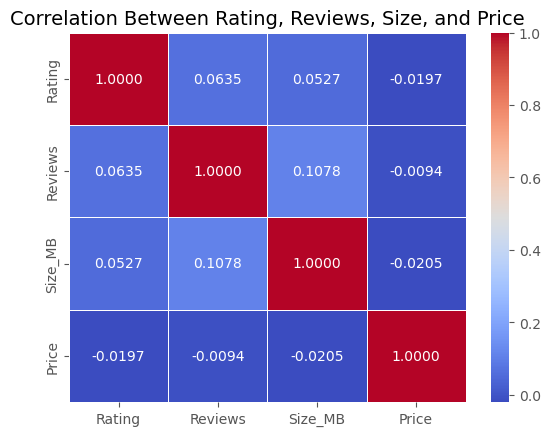

In [98]:
corr_columns = ['Rating', 'Reviews', 'Size_MB', 'Price']

corr_matrix = df[corr_columns].corr()

print(corr_matrix)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Between Rating, Reviews, Size, and Price", fontsize=14)
plt.show()

11.	How many apps exist for each type (free/paid) across different content ratings?

12.	How many apps are compatible with Android version 4.x?

### Visualisation and Dashboarding

### Outlier Detection and Handling

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,Last Updated,Size_MB,Android_Ver_Num
count,10356.000000,1.035600e+04,1.035600e+04,10356.000000,10356,10356.000000,10356.000000
mean,4.203727,4.059438e+05,1.415913e+07,1.030900,2017-11-14 08:53:57.079953664,20.067348,3.870713
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00,0.008500,1.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000,2017-09-02 18:00:00,5.700000,4.000000
50%,4.300000,1.683000e+03,1.000000e+05,0.000000,2018-05-20 00:00:00,13.000000,4.000000
75%,4.500000,4.643825e+04,1.000000e+06,0.000000,2018-07-19 00:00:00,26.000000,4.100000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,100.000000,8.000000
std,0.485617,2.696905e+06,8.024331e+07,16.279408,NaN,21.020598,0.792906


In [ ]:
num_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers detected.")
    return outliers

for col in num_cols:
    detect_outliers(df, col)


Rating: 723 outliers detected.
Reviews: 1870 outliers detected.
Installs: 2566 outliers detected.
Price: 765 outliers detected.
Size_MB: 831 outliers detected.


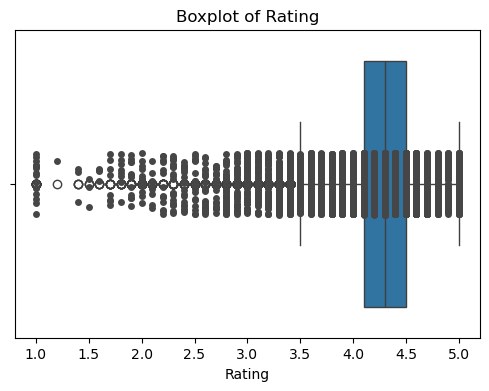

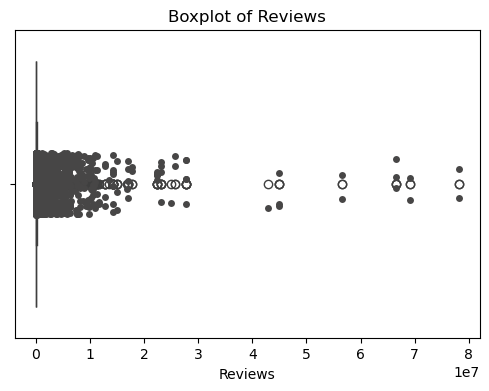

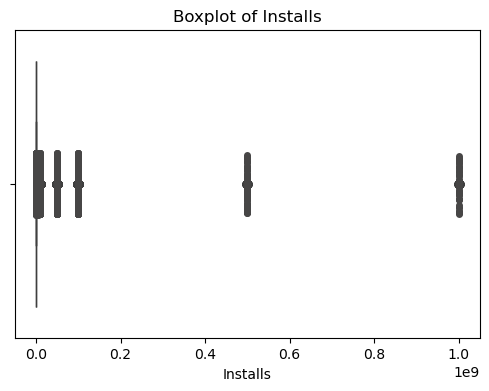

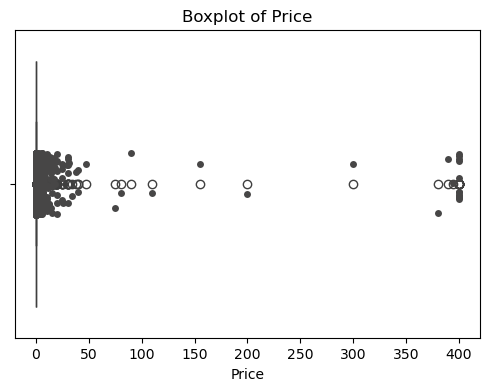

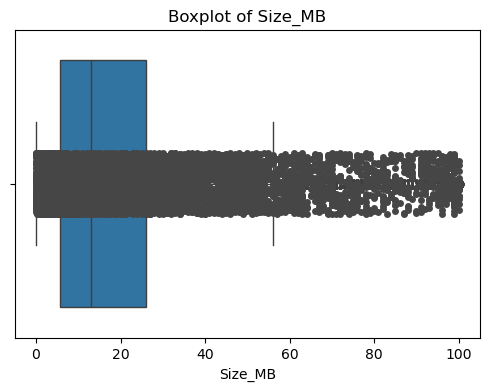

In [ ]:
num_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, data=df)
    sns.stripplot(x=col, data=df, color="#474646")
    plt.title(f"Boxplot of {col}")
    plt.show()
    
# sns.boxplot(x=['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB'], data=df)
# sns.stripplot(x=['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB'], data=df, color="#474646")
